# Projet de Machine Learning: Prédiction des performances de l'équipe nationale du Maroc à partir des données du jeu video FIFA

###                 Introduction :

            L'évolution de la série FIFA, de 2015 à 2023, a été marquée par des avancées significatives dans le 
      domaine de la simulation footballistique. FIFA, développé par EA Vancouver, est le jeu vidéo de référence 
      en matière de football virtuel, offrant une expérience immersive et réaliste aux joueurs du monde entier. 
      Chaque année, la franchise FIFA apporte son lot d'innovations, de nouvelles fonctionnalités et d'améliorations 
      graphiques, capturant l'essence même du football. De FIFA 15 à FIFA 19, les joueurs ont été immergés dans des
      mécanismes de jeu réalistes et des modes de jeu captivants, tandis que l'introduction des compétitions de clubs 
      de l'UEFA dans FIFA 19 a marqué une étape importante pour la franchise. Dans ce contexte d'évolution constante, 
      notre projet se concentre sur l'utilisation des données de FIFA 2015 à 2023 pour prédire les performances de 
      l'équipe nationale du Maroc, combinant l'expertise de la série FIFA avec les avancées en matière d'apprentissage
      automatique pour fournir des insights précieux dans le domaine du sport.


## Plan
### 1.Aperçu des données disponibles
### 2.Nettoyage des données
### 3.Analyse des données
### 4.Modélisation



  

## 1.Aperçu des données disponibles

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [262]:
# read csv files FIFA15
df15 = pd.read_csv("15male_players.csv",low_memory=False)
# read csv files FIFA18
df18 = pd.read_csv("18male_players.csv")
# read csv files FIFA22
df22 = pd.read_csv("22male_players.csv")

In [263]:
#we focus on Morrocan players
specific_value = 'Morocco'
# Filter rows where column 'column' has the specific value
df15 = df15[df15['nationality_name'] == specific_value]
df18 = df18[df18['nationality_name'] == specific_value]
df22 = df22[df22['nationality_name'] == specific_value]S

In [264]:
pd.set_option('display.max_columns',None)
display(df15.head()) 
display(df18.head())
display(df22.head())

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,league_id,league_name,league_level,club_team_id,club_name,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
57,177509,/player/177509/medhi-benatia/150059,15,59,2015-09-10,M. Benatia,Medhi Amine El Mouttaqi Benatia,CB,84,86,20500000.0,170000.0,27,1987-04-17,190,92,19.0,Bundesliga,1.0,21.0,FC Bayern München,LCB,5.0,NaN,2014-08-26,2019.0,129,Morocco,NaN,NaN,NaN,Right,3,2,2,Medium/Medium,Normal (185+),No,NaN,"#Tackling, #Strength",Power Header,66.0,45.0,54.0,64.0,87.0,84.0,45,49,85,65,29,59,32,27,63,71,64,67,67,83,48,61,80,76,87,24,85,85,39,47,46,NaN,87,88,86,7,4,8,7,11,NaN,59,59,59,57,57,57,57,57,57,57,57,61,64,64,64,61,74,76,76,76,74,79,84,84,84,79,12,https://cdn.sofifa.net/players/177/509/15_120.png
221,164435,/player/164435/mbark-boussoufa/150059,15,59,2015-09-10,M. Boussoufa,Mbark Boussoufa,CAM,80,80,11500000.0,80000.0,29,1984-08-15,167,61,67.0,Premier League,1.0,100765.0,Lokomotiv Moskva,SUB,11.0,NaN,2013-08-16,2016.0,129,Morocco,NaN,NaN,NaN,Right,3,5,2,Medium/Medium,Lean (170-),No,NaN,#Acrobat,"Diver, Playmaker (AI), Technical Dribbler (AI)",80.0,72.0,82.0,84.0,42.0,55.0,81,72,45,82,69,84,79,77,80,80,84,76,92,77,91,72,80,84,34,74,66,47,76,84,72,NaN,35,42,47,10,14,13,13,14,NaN,71,71,71,81-1,76,76,76,81-1,80,80,80,81-1,76,76,76,81-1,66,65,65,65,66,60,51,51,51,60,17,https://cdn.sofifa.net/players/164/435/15_120.png
463,179605,/player/179605/adel-taarabt/150059,15,59,2015-09-10,A. Taarabt,Adel Taarabt,"CAM, LM",78,80,9500000.0,60000.0,25,1989-05-24,178,85,13.0,Premier League,1.0,15.0,Queens Park Rangers,SUB,27.0,NaN,2010-08-01,2016.0,129,Morocco,NaN,NaN,NaN,Right,4,5,2,Medium/Low,Normal (170-185),Yes,NaN,NaN,"Selfish, Flair, Long Shot Taker (AI), Technica...",74.0,72.0,77.0,83.0,31.0,62.0,78,70,35,80,76,85,79,72,70,83,78,71,84,74,78,72,45,55,68,76,58,38,74,76,76,NaN,28,29,29,3,5,3,3,5,NaN,71,71,71,79,74,74,74,79,78,78,78,77,70,70,70,77,58,59,59,59,58,50,45,45,45,50,8,https://cdn.sofifa.net/players/179/605/15_120.png
596,183108,/player/183108/nordin-amrabat/150059,15,59,2015-09-10,N. Amrabat,Noureddine Amrabat,"ST, LM, CAM",77,77,6000000.0,60000.0,27,1987-03-31,178,77,53.0,La Liga,1.0,573.0,Málaga,SUB,2.0,NaN,2015-07-01,2017.0,129,Morocco,NaN,NaN,NaN,Right,2,4,1,Medium/Low,Normal (170-185),No,NaN,#Acrobat,"Selfish, Speed Dribbler (AI), Outside Foot Shot",88.0,76.0,71.0,81.0,37.0,73.0,78,75,74,73,74,83,74,67,70,78,89,87,90,74,75,78,58,79,75,77,66,33,76,63,75,NaN,28,40,28,10,13,6,5,12,NaN,77,77,77,79-2,77,77,77,79-2,76,76,76,77,69,69,69,77,60,60,60,60,60,56,51,51,51,56,14,https://cdn.sofifa.net/players/183/108/15_120.png
921,134906,/player/134906/marouane-chamakh/150059,15,59,2015-09-10,M. Chamakh,Marouane Chamakh,"ST, CF, CAM",75,75,3300000.0,40000.0,30,1984-01-10,185,

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,league_id,league_name,league_level,club_team_id,club_name,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
77,177509,/player/177509/medhi-benatia/180084,18,84,2018-09-12,M. Benatia,Medhi Amine El Mouttaqi Benatia,CB,85,85,28500000.0,140000.0,30,1987-04-17,189,94,31.0,Serie A,1.0,45.0,Juventus,RCB,4.0,NaN,2014-08-26,2020.0,129,Morocco,NaN,NaN,NaN,Right,3,2,3,Medium/High,Normal (185+),Yes,47000000.0,"#Tactician, #Strength","Injury Prone, Power Header",74.0,44.0,54.0,64.0,86.0,82.0,45,47,84,65,37,64,34,27,65,65,72,76,59,80,53,62,84,68,89,24,82,86,38,47,41,78,88,86,84,7,4,8,7,11,NaN,61+2,61+2,61+2,58+1,59+1,59+1,59+1,58+1,58+2,58+2,58+2,61+2,62+2,62+2,62+2,61+2,73+2,76+2,76+2,76+2,73+2,76+2,83+2,83+2,83+2,76+2,15+2,https://cdn.sofifa.net/players/177/509/18_120.png
327,193738,/player/193738/younes-belhanda/180084,18,84,2018-09-12,Y. Belhanda,Younès Belhanda,"CAM, LW",81,81,18500000.0,70000.0,27,1990-02-25,177,75,68.0,Super Lig,1.0,325.0,Galatasaray,CAM,10.0,NaN,2017-07-04,2021.0,129,Morocco,NaN,NaN,NaN,Right,4,4,2,Medium/Medium,Normal (170-185),No,35200000.0,#Dribbler,"Finesse Shot, Flair, Playmaker (AI), Technical...",75.0,77.0,79.0,84.0,56.0,70.0,79,75,67,79,69,86,78,78,79,83,77,73,87,79,77,78,74,79,63,81,75,66,74,79,80,72,49,54,55,15,16,11,6,16,NaN,76+1,76+1,76+1,80,79,79,79,80,80+1,80+1,80+1,79+1,78+1,78+1,78+1,79+1,71+1,70+1,70+1,70+1,71+1,68+1,63+1,63+1,63+1,68+1,20+1,https://cdn.sofifa.net/players/193/738/18_120.png
365,208670,/player/208670/hakim-ziyech/180084,18,84,2018-09-12,H. Ziyech,Hakim Ziyech,"CM, CAM",81,85,23000000.0,15000.0,24,1993-03-19,180,70,10.0,Eredivisie,1.0,245.0,Ajax,RCM,10.0,NaN,2016-08-30,2021.0,129,Morocco,NaN,NaN,NaN,Left,2,4,2,High/Medium,Lean (170-185),Yes,33900000.0,"#Playmaker, #Crosser","Flair, Long Shot Taker (AI), Playmaker (AI), O...",76.0,73.0,86.0,81.0,52.0,64.0,86,69,53,86,77,84,90,78,82,80,74,77,77,82,60,80,42,77,59,72,66,66,75,88,73,78,44,54,36,11,7,11,8,14,NaN,74+1,74+1,74+1,80,79,79,79,80,81+1,81+1,81+1,81+1,80+1,80+1,80+1,81+1,70+1,69+1,69+1,69+1,70+1,66+1,58+1,58+1,58+1,66+1,18+1,https://cdn.sofifa.net/players/208/670/18_120.png
548,162329,/player/162329/karim-el-ahmadi/180084,18,84,2018-09-12,K. El Ahmadi,Karim El Ahmadi Al Aroos,"CM, CDM",79,79,9500000.0,20000.0,32,1985-01-27,179,78,10.0,Eredivisie,1.0,246.0,Feyenoord,RCM,8.0,NaN,2014-09-01,2019.0,129,Morocco,NaN,NaN,NaN,Right,2,3,2,Medium/High,Normal (170-185),Yes,13300000.0,NaN,Long Shot Taker (AI),65.0,62.0,73.0,76.0,72.0,78.0,60,54,60,80,65,73,68,50,80,82,66,65,74,81,72,74,67,83,74,66,84,76,64,75,69,84,66,78,73,12,16,11,14,8,NaN,68+2,68+2,68+2,70+1,71+1,71+1,71+1,70+1,74+2,74+2,74+2,72+2,77+2,77+2,77+2,72+2,74+2,78+1,78+1,78+1,74+2,73+2,74+2,74+2,74+2,73+2,20+2,https:

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,league_id,league_name,league_level,club_team_id,club_name,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
92,235212,/player/235212/achraf-hakimi/220064,22,64,2022-07-18,A. Hakimi,Achraf Hakimi Mouh,"RB, RWB",85,89,73000000.0,100000.0,22,1998-11-04,181,73,16.0,Ligue 1,1.0,73.0,Paris Saint Germain,RB,2.0,NaN,2021-07-06,2026.0,129,Morocco,NaN,NaN,NaN,Right,4,4,2,High/Medium,Lean (170-185),Yes,140500000.0,#Speedster,"Solid Player, Speed Dribbler (AI), Outside Foo...",94.0,75.0,80.0,82.0,76.0,79.0,86,75,68,81,74,80,77,74,73,83,93,95,84,84,79,80,80,93,74,73,75,78,79,78,60,83,75,77,76,10,8,14,6,8,NaN,79+2,79+2,79+2,82,81,81,81,82,81+2,81+2,81+2,83+2,80+2,80+2,80+2,83+2,83+2,79+2,79+2,79+2,83+2,82+2,77+2,77+2,77+2,82+2,17+2,https://cdn.sofifa.net/players/235/212/22_120.png
156,208670,/player/208670/hakim-ziyech/220064,22,64,2022-07-18,H. Ziyech,Hakim Ziyech,"RW, CAM",83,83,36500000.0,155000.0,28,1993-03-19,181,65,13.0,Premier League,1.0,5.0,Chelsea,SUB,22.0,NaN,2020-07-01,2025.0,129,Morocco,NaN,NaN,NaN,Left,2,5,3,High/High,Unique,Yes,67500000.0,"#Playmaker, #Crosser, #Complete Midfielder","Flair, Long Shot Taker (AI), Playmaker (AI), O...",76.0,77.0,87.0,83.0,50.0,65.0,88,73,52,86,74,83,90,78,89,84,78,75,84,83,78,83,33,78,58,80,73,51,81,88,67,79,44,57,41,11,7,11,8,14,NaN,76+3,76+3,76+3,82,81,81,81,82,83,83,83,83,81+2,81+2,81+2,83,70+3,69+3,69+3,69+3,70+3,66+3,57+3,57+3,57+3,66+3,18+3,https://cdn.sofifa.net/players/208/670/22_120.png
221,209981,/player/209981/yassine-bounou/220064,22,64,2022-07-18,Y. Bounou,Yassine Bounou,GK,82,82,20500000.0,29000.0,30,1991-04-05,192,78,53.0,La Liga,1.0,481.0,Sevilla,GK,13.0,NaN,2020-09-04,2025.0,129,Morocco,NaN,NaN,NaN,Left,2,1,1,Medium/Medium,Lean (185+),Yes,43100000.0,NaN,"GK Long Throw, Comes For Crosses, Saves with Feet",NaN,NaN,NaN,NaN,NaN,NaN,15,14,14,39,13,20,12,19,44,12,37,34,47,80,29,57,48,43,69,19,25,12,10,60,24,57,20,18,15,82,79,76,81,84,36.0,29+2,29+2,29+2,28,30,30,30,28,33+2,33+2,33+2,31+2,35+2,35+2,35+2,31+2,28+2,32+2,32+2,32+2,28+2,27+2,28+2,28+2,28+2,27+2,81+1,https://cdn.sofifa.net/players/209/981/22_120.png
252,235410,/player/235410/youssef-en-nesyri/220064,22,64,2022-07-18,Y. En-Nesyri,Youssef En-Nesyri,"ST, LW",82,86,44000000.0,37000.0,24,1997-06-01,188,78,53.0,La Liga,1.0,481.0,Sevilla,SUB,15.0,NaN,2020-01-16,2025.0,129,Morocco,NaN,NaN,NaN,Left,4,3,2,High/High,Lean (185+),Yes,95700000.0,NaN,"Speed Dribbler (AI), Power Header",78.0,83.0,59.0,78.0,35.0,76.0,48,89,84,69,76,84,63,56,58,79,75,81,68,80,47,83,83,76,76,75,76,31,82,52,70,74,27,31,27,13,9,14,9,13,NaN,82+2,82+2,82+2,75,78,78,78,75,74+2,74+2,74+2,73+2,67+2,67+2,67+2,73+2,55+2,54+2,54+2,54+2,55+2,53+2,52+2,52+2,52+2,53+2,19+2,https://cdn.sofifa.net/players/235/410

In [265]:
df15.columns.to_list()

['player_id',
 'player_url',
 'fifa_version',
 'fifa_update',
 'fifa_update_date',
 'short_name',
 'long_name',
 'player_positions',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'league_id',
 'league_name',
 'league_level',
 'club_team_id',
 'club_name',
 'club_position',
 'club_jersey_number',
 'club_loaned_from',
 'club_joined_date',
 'club_contract_valid_until_year',
 'nationality_id',
 'nationality_name',
 'nation_team_id',
 'nation_position',
 'nation_jersey_number',
 'preferred_foot',
 'weak_foot',
 'skill_moves',
 'international_reputation',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'player_traits',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_bal

In [266]:
# I will choose only most intersting columns
columns_del =['player_id', 'player_url','fifa_update','wage_eur','short_name', 'player_positions','fifa_update_date','dob', 
              'nation_position', 'long_name', 'height_cm', 'weight_kg', 'goalkeeping_speed', 'league_id', 
              'club_team_id', 'club_jersey_number','club_loaned_from', 'club_joined_date', 'club_contract_valid_until_year', 
              'nationality_id', 'nation_team_id','nation_jersey_number', 'body_type', 'real_face', 'release_clause_eur', 
              'player_tags', 'player_traits', 'player_face_url']
df15.drop(columns_del,axis=1, inplace=True)
df18.drop(columns_del,axis=1, inplace=True)
df22.drop(columns_del,axis=1, inplace=True)

In [267]:
df15.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3901 entries, 57 to 961764
Data columns (total 82 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   fifa_version                 3901 non-null   int64  
 1   overall                      3901 non-null   int64  
 2   potential                    3901 non-null   int64  
 3   value_eur                    3901 non-null   float64
 4   age                          3901 non-null   int64  
 5   league_name                  3901 non-null   object 
 6   league_level                 3901 non-null   float64
 7   club_name                    3901 non-null   object 
 8   club_position                3901 non-null   object 
 9   nationality_name             3901 non-null   object 
 10  preferred_foot               3901 non-null   object 
 11  weak_foot                    3901 non-null   int64  
 12  skill_moves                  3901 non-null   int64  
 13  international_reputa

In [268]:
pd.set_option('display.max_rows',None)
df15.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
fifa_version,3901.0,NaN,NaN,NaN,15.0,0.0,15.0,15.0,15.0,15.0,15.0
overall,3901.0,NaN,NaN,NaN,67.52525,6.412543,52.0,63.0,67.0,73.0,84.0
potential,3901.0,NaN,NaN,NaN,71.557293,5.473677,60.0,67.0,72.0,75.0,88.0
value_eur,3901.0,NaN,NaN,NaN,1872732.632658,3090446.589176,40000.0,300000.0,725000.0,2500000.0,20500000.0
age,3901.0,NaN,NaN,NaN,24.776211,3.976199,16.0,22.0,25.0,27.0,34.0
league_name,3901,18,Eredivisie,705,NaN,NaN,NaN,NaN,NaN,NaN,NaN
league_level,3901.0,NaN,NaN,NaN,1.271469,0.444774,1.0,1.0,1.0,2.0,2.0
club_name,3901,104,Sivasspor,138,NaN,NaN,NaN,NaN,NaN,NaN,NaN
club_position,3901,24,SUB,1618,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nationality_name,3901,1,Morocco,3901,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [269]:
df18.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
fifa_version,7083.0,NaN,NaN,NaN,18.0,0.0,18.0,18.0,18.0,18.0,18.0
overall,7083.0,NaN,NaN,NaN,69.694762,5.961446,50.0,65.0,70.0,74.0,85.0
potential,7083.0,NaN,NaN,NaN,74.11097,5.073907,50.0,71.0,74.0,77.0,86.0
value_eur,7083.0,NaN,NaN,NaN,3985559.791049,5069257.226118,7000.0,750000.0,1500000.0,6500000.0,28500000.0
age,7083.0,NaN,NaN,NaN,24.704645,4.288227,18.0,21.0,25.0,28.0,37.0
league_name,7083,20,Eredivisie,1651,NaN,NaN,NaN,NaN,NaN,NaN,NaN
league_level,7083.0,NaN,NaN,NaN,1.271495,0.454808,1.0,1.0,1.0,2.0,3.0
club_name,7083,123,FC Utrecht,336,NaN,NaN,NaN,NaN,NaN,NaN,NaN
club_position,7083,24,SUB,2947,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nationality_name,7083,1,Morocco,7083,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [270]:
df22.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
fifa_version,725.0,NaN,NaN,NaN,22.0,0.0,22.0,22.0,22.0,22.0,22.0
overall,725.0,NaN,NaN,NaN,70.244138,5.88187,53.0,67.0,70.0,74.0,85.0
potential,725.0,NaN,NaN,NaN,73.641379,5.220386,62.0,69.0,74.0,77.0,89.0
value_eur,725.0,NaN,NaN,NaN,5422613.793103,10580718.584399,210000.0,1100000.0,2100000.0,4500000.0,73000000.0
age,725.0,NaN,NaN,NaN,25.98069,4.198416,17.0,23.0,25.0,29.0,34.0
league_name,725,21,Eredivisie,85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
league_level,725.0,NaN,NaN,NaN,1.193103,0.462645,1.0,1.0,1.0,1.0,3.0
club_name,725,77,Sevilla,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
club_position,725,21,SUB,251,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nationality_name,725,1,Morocco,725,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2.Nettoyage des données

In [271]:
pip install missingno

<Axes: >

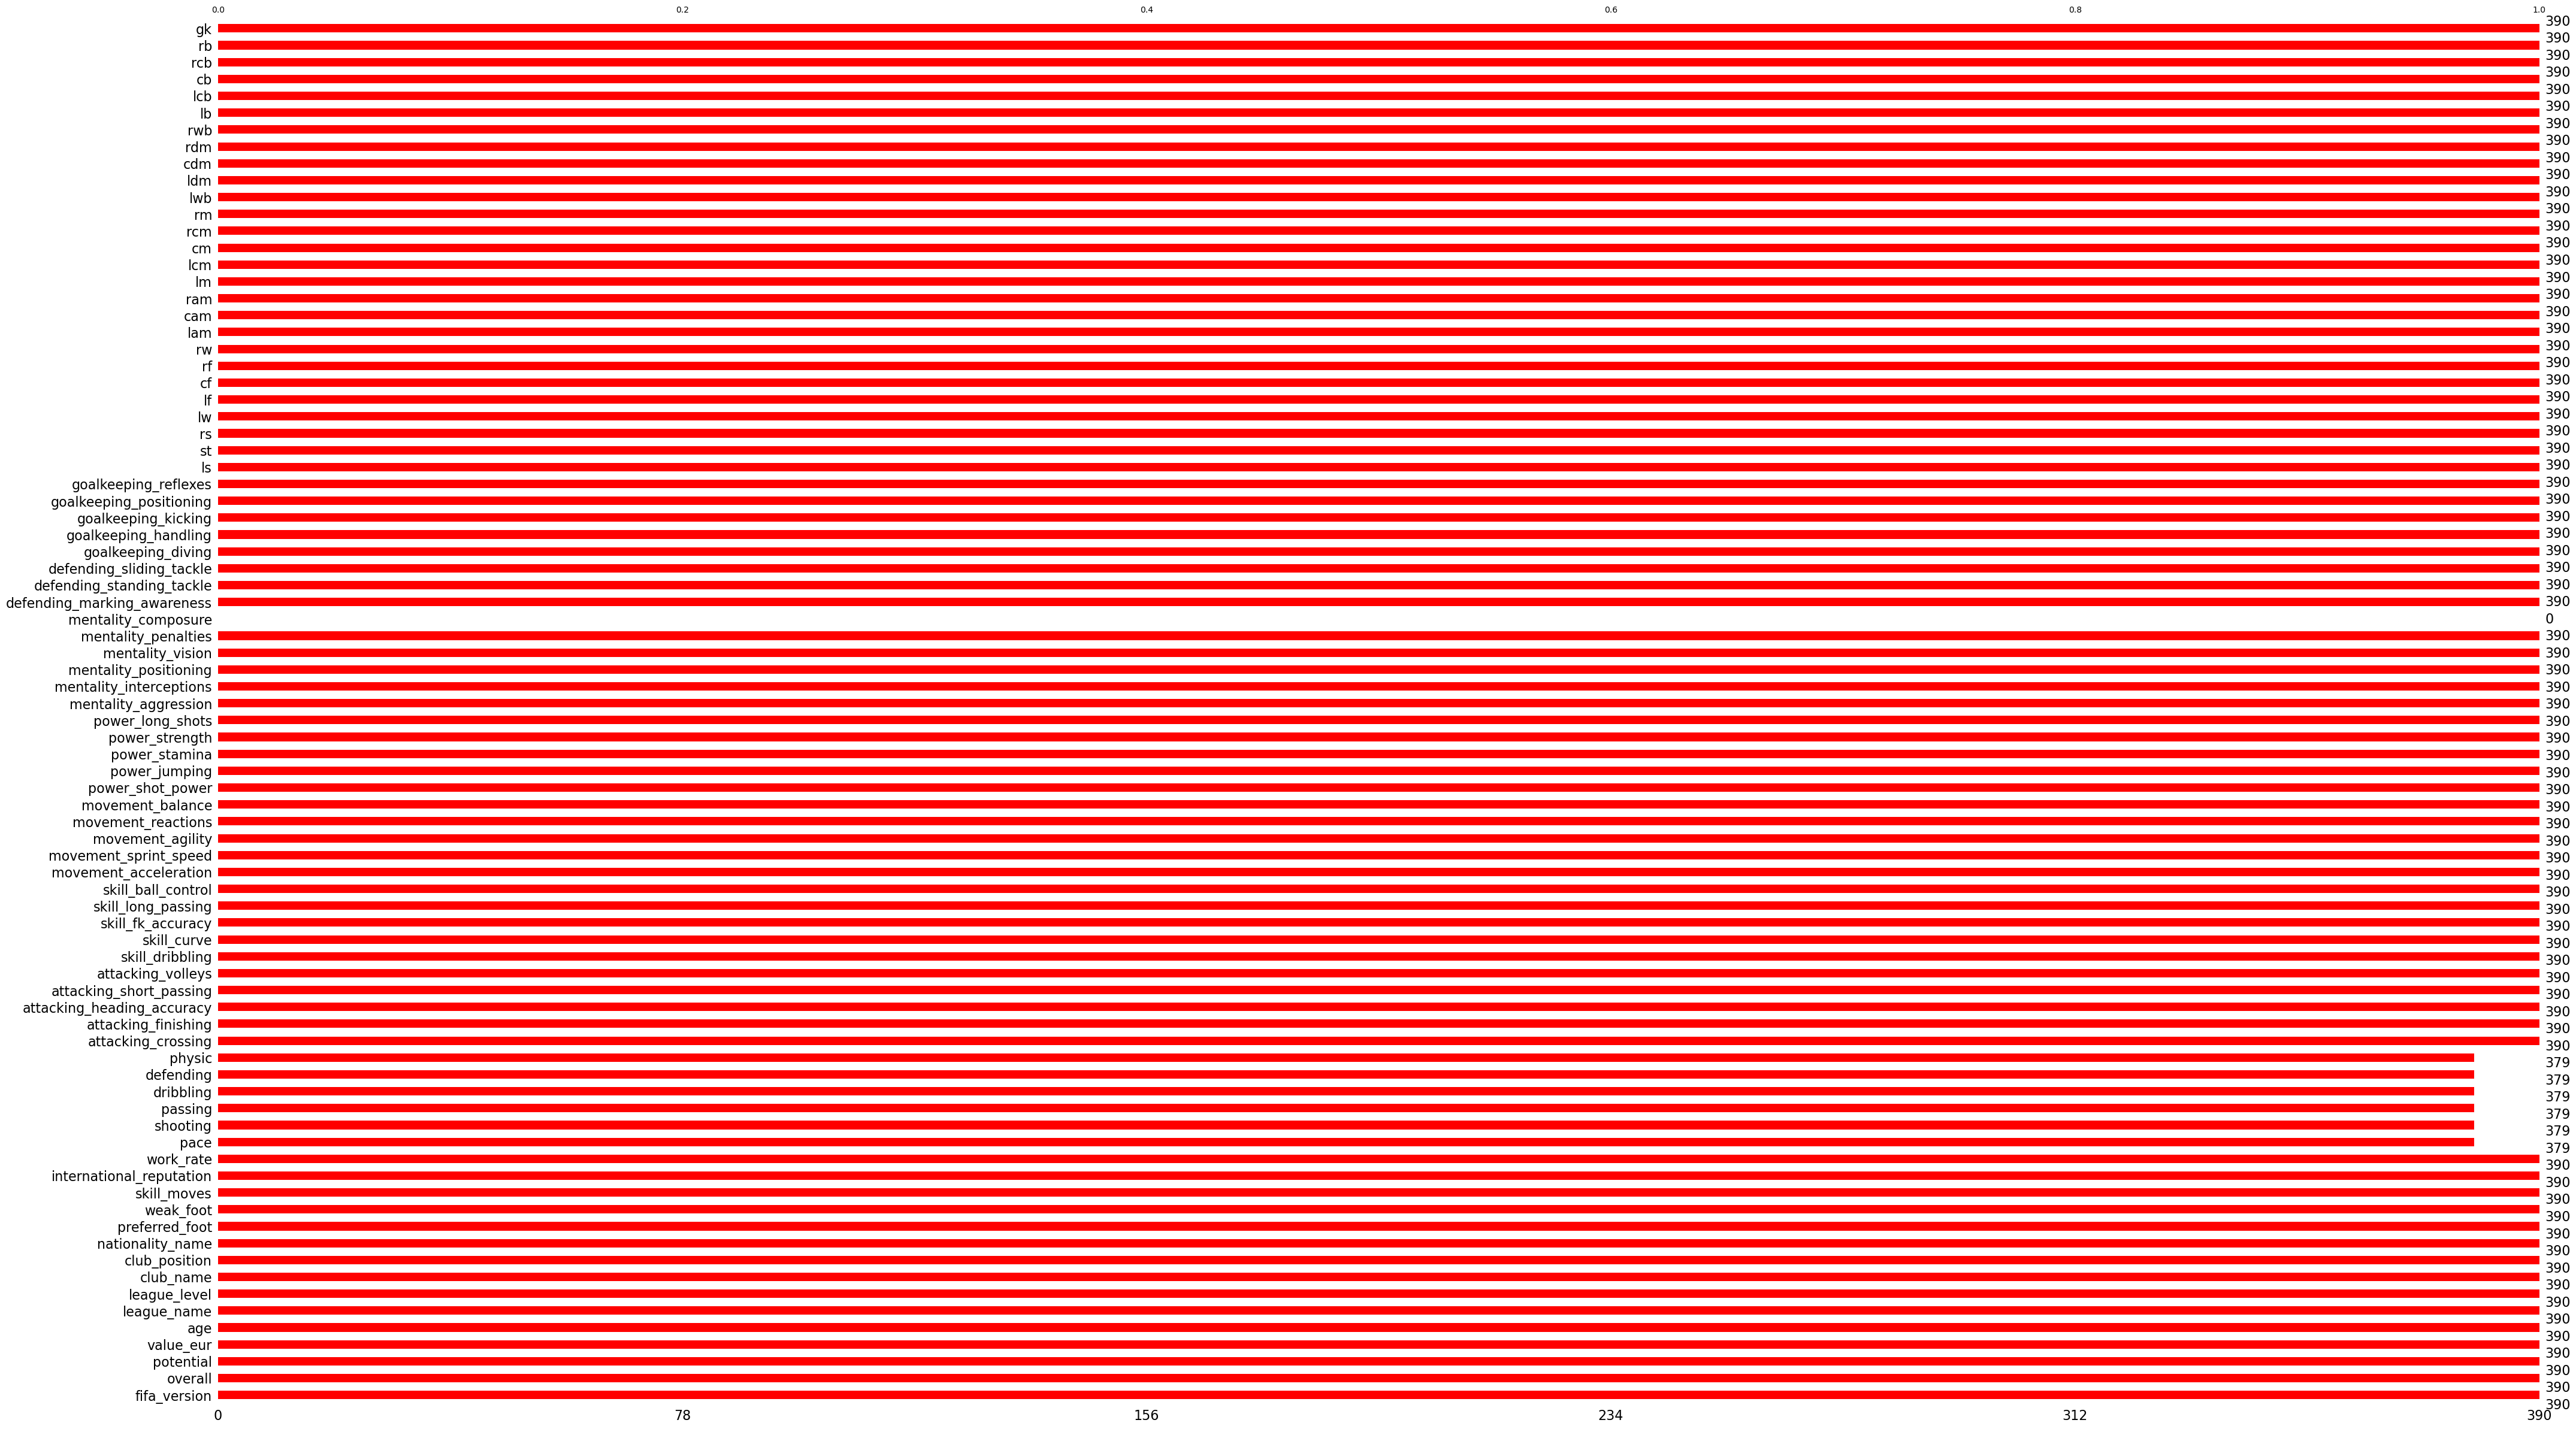

In [272]:
import missingno as msno
msno.bar(df15.sample(n=390),(50,30),color='red')

In [273]:
df15.isnull().sum()

fifa_version                      0
overall                           0
potential                         0
value_eur                         0
age                               0
league_name                       0
league_level                      0
club_name                         0
club_position                     0
nationality_name                  0
preferred_foot                    0
weak_foot                         0
skill_moves                       0
international_reputation          0
work_rate                         0
pace                            133
shooting                        133
passing                         133
dribbling                       133
defending                       133
physic                          133
attacking_crossing                0
attacking_finishing               0
attacking_heading_accuracy        0
attacking_short_passing           0
attacking_volleys                 0
skill_dribbling                   0
skill_curve                 

Nous remplaçons les valeurs manquantes par la valeurs la plus fréquentes qui est le mode de chaque colonne

In [275]:
df15['pace'].fillna(df15['pace'].mode()[0], inplace=True)
df15['shooting'].fillna(df15['shooting'].mode()[0], inplace=True)
df15['passing'].fillna(df15['passing'].mode()[0], inplace=True)
df15['dribbling'].fillna(df15['dribbling'].mode()[0], inplace=True)
df15['defending'].fillna(df15['defending'].mode()[0], inplace=True)
df15['physic'].fillna(df15['physic'].mode()[0], inplace=True)

In [276]:
df18['pace'].fillna(df18['pace'].mode()[0], inplace=True)
df18['shooting'].fillna(df18['shooting'].mode()[0], inplace=True)
df18['passing'].fillna(df18['passing'].mode()[0], inplace=True)
df18['dribbling'].fillna(df18['dribbling'].mode()[0], inplace=True)
df18['defending'].fillna(df18['defending'].mode()[0], inplace=True)
df18['physic'].fillna(df18['physic'].mode()[0], inplace=True)

In [277]:
df15.isnull().sum()

fifa_version                      0
overall                           0
potential                         0
value_eur                         0
age                               0
league_name                       0
league_level                      0
club_name                         0
club_position                     0
nationality_name                  0
preferred_foot                    0
weak_foot                         0
skill_moves                       0
international_reputation          0
work_rate                         0
pace                              0
shooting                          0
passing                           0
dribbling                         0
defending                         0
physic                            0
attacking_crossing                0
attacking_finishing               0
attacking_heading_accuracy        0
attacking_short_passing           0
attacking_volleys                 0
skill_dribbling                   0
skill_curve                 

In [278]:
df15.drop(['mentality_composure'],axis=1,inplace=True)

In [279]:
df15.drop(['fifa_version','nationality_name'],axis=1,inplace=True)

In [280]:
df15.drop(['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam',
       'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm',
       'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk'],axis=1,inplace=True)

In [281]:
df18.drop(['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam',
       'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm',
       'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk','fifa_version',
           'nationality_name','mentality_composure'],axis=1,inplace=True)

In [282]:
df18.shape

(7083, 52)

## 3.Analyse des données

In [283]:
var_categorielles = df15.select_dtypes(include=['object'])
var_categorielles.columns

Index(['league_name', 'club_name', 'club_position', 'preferred_foot',
       'work_rate'],
      dtype='object')

In [284]:
var_categorielles.head()

,league_name,club_name,club_position,preferred_foot,work_rate
57,Bundesliga,FC Bayern München,LCB,Right,Medium/Medium
221,Premier League,Lokomotiv Moskva,SUB,Right,Medium/Medium
463,Premier League,Queens Park Rangers,SUB,Right,Medium/Low
596,La Liga,Málaga,SUB,Right,Medium/Low
921,Premier League,Crystal Palace,SUB,Right,Medium/Low


 Pour traiter les variables catégorielles nous allons effectuer one-hot encoding

In [285]:
df15 = pd.get_dummies(df15, columns=['league_name', 'club_name', 'club_position', 'preferred_foot',
       'work_rate'] , drop_first=True)
df18 = pd.get_dummies(df18, columns=['league_name', 'club_name', 'club_position', 'preferred_foot',
       'work_rate'] , drop_first=True)

In [286]:
df15.head()

,overall,potential,value_eur,age,league_level,weak_foot,skill_moves,international_reputation,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,league_name_Bundesliga,league_name_Championship,league_name_Ekstraklasa,league_name_Eliteserien,league_name_Eredivisie,league_name_Jupiler Pro League,league_name_La Liga,league_name_La Liga 2,league_name_Ligue 1,league_name_Ligue 2,league_name_Major League Soccer,league_name_Premier League,league_name_Pro League,league_name_Serie A,league_name_Serie B,league_name_Super Lig,league_name_Superliga,club_name_AC Ajaccio,club_name_AC Arles Avignon,club_name_AJ Auxerre,club_name_AS Monaco,club_name_AS Nancy Lorraine,club_name_Aalesund,club_name_Aalesunds FK,club_name_Ajaccio,club_name_Akhmat Grozny,club_name_Al Raed,club_name_Almería,club_name_Angers SCO,club_name_Arles,club_name_Aston Villa,club_name_Atlético de Madrid,club_name_Auxerre,club_name_Barcelona II,club_name_Bologna,club_name_Brest,club_name_Châteauroux,club_name_Crystal Palace,club_name_Demir Grup Sivasspor,club_name_Excelsior,club_name_FC Barcelona B,club_name_FC Bayern München,club_name_FC Groningen,club_name_FC Lokomotiv Moscow,club_name_FC Sochaux-Montbéliard,club_name_FC Twente,club_name_FC Union Berlin,club_name_FC Utrecht,club_name_Feyenoord,club_name_Fiorentina,club_name_Fulham,club_name_Galatasaray SK,club_name_Genoa,club_name_Gençlerbirliği,club_name_Granada,club_name_Granada CF,club_name_Guingamp,club_name_Hellas Verona,club_name_Heracles Almelo,club_name_Juventus,club_name_Korona Kielce,club_name_La Berrichonne de Châteauroux,club_name_Latina,club_name_Laval,club_name_Le Havre,club_name_Le Havre AC,club_name_Lens,club_name_Levante,club_name_Levante Unión Deportiva,club_name_Lierse,club_name_Lierse SK,club_name_Liverpool,club_name_Llagostera-Costa Brava,club_name_Lokomotiv Moskva,club_name_Milan,club_name_Monaco,club_name_Montpellier,club_name_Montpellier Hérault SC,club_name_Málaga,club_name_Málaga CF,club_name_NAC Breda,club_name_Nancy,club_name_Nantes,club_name_Numancia,club_name_Nîmes,club_name_Olympique Marseille,club_name_Olympique de Marseille,club_name_Palermo,club_name_Parma,club_name_Queens Park Rangers,club_name_Racing Club de Lens,club_name_Real Valladolid,club_name_Real Valladolid CF,club_name_Real Zaragoza,club_name_SV Sandhausen,club_name_SV Zulte Waregem,club_name_Sandhausen,club_name_Sivasspor,club_name_Sochaux,club_name_Stade Brestois 29,club_name_Stade Lavallois Mayenne FC,club_name_Standard Liège,club_name_Standard de Liège,club_name_Stoke City,club_name_SønderjyskE,club_name_Terek Grozny,club_name_Torino,club_name_Torino F.C.,club_name_Toronto,club_name_Toulouse,club_name_Toulouse Football Club,club_name_UE Llagostera,club_name_Unión Deportiva Almería,club_name_Vancouver Whitecaps,club_name_Vancouver Whitecaps FC,club_name_Varese,club_name_Vitesse,club_name_Waasland-Beveren,club_name_Willem II,club_name_Zulte-Waregem,club_position_CB,club_position_CDM,club_position_CM,club_position_GK,club_position_LB,club_position_LCB,club_position_LCM,club_position_LDM,club_position_LF,club_position_LM,club_position_LS,club_position_LW,club_position_RAM,club_position_RB,club_position_RCB,club_position_RCM,club_position_RDM,club_position_RES,club_position_RM,club_position_RS,club_position_RW,club_position_ST,club_position_SUB,preferred_foot_Right,work_rate_High/Low,work_rate

In [287]:
var_numeriques = df15.select_dtypes(include=['int64','float64'])
var_numeriques.columns

Index(['overall', 'potential', 'value_eur', 'age', 'league_level', 'weak_foot',
       'skill_moves', 'international_reputation', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'defending_marking_awareness', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeepi

Pour eviter les grands ecarts parmi les valeurs numériques nous allons procéder à la mise à l'echelle des valeurs numerique

In [288]:
from sklearn.preprocessing import StandardScaler

# Création d'un objet StandardScaler
scaler = StandardScaler()

# Sélection des variables numériques
variables_numeriques = df15[[ 'potential', 'value_eur', 'age', 'league_level', 'weak_foot',
       'skill_moves', 'international_reputation', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'defending_marking_awareness', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes']]

# Standardisation des variables numériques
variables_numeriques_standardisees = scaler.fit_transform(variables_numeriques)

# Remplacement des valeurs dans le DataFrame d'origine
df15[[ 'potential', 'value_eur', 'age', 'league_level', 'weak_foot',
       'skill_moves', 'international_reputation', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'defending_marking_awareness', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes']] = variables_numeriques_standardisees

In [289]:
from sklearn.preprocessing import StandardScaler

# Création d'un objet StandardScaler
scaler = StandardScaler()

# Sélection des variables numériques
variables_numeriques2 = df18[[ 'potential', 'value_eur', 'age', 'league_level', 'weak_foot',
       'skill_moves', 'international_reputation', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'defending_marking_awareness', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes']]

# Standardisation des variables numériques
variables_numeriques_standardisees2 = scaler.fit_transform(variables_numeriques2)

# Remplacement des valeurs dans le DataFrame d'origine
df18[[ 'potential', 'value_eur', 'age', 'league_level', 'weak_foot',
       'skill_moves', 'international_reputation', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'defending_marking_awareness', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes']] = variables_numeriques_standardisees2

In [290]:
df15.head()

,overall,potential,value_eur,age,league_level,weak_foot,skill_moves,international_reputation,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,league_name_Bundesliga,league_name_Championship,league_name_Ekstraklasa,league_name_Eliteserien,league_name_Eredivisie,league_name_Jupiler Pro League,league_name_La Liga,league_name_La Liga 2,league_name_Ligue 1,league_name_Ligue 2,league_name_Major League Soccer,league_name_Premier League,league_name_Pro League,league_name_Serie A,league_name_Serie B,league_name_Super Lig,league_name_Superliga,club_name_AC Ajaccio,club_name_AC Arles Avignon,club_name_AJ Auxerre,club_name_AS Monaco,club_name_AS Nancy Lorraine,club_name_Aalesund,club_name_Aalesunds FK,club_name_Ajaccio,club_name_Akhmat Grozny,club_name_Al Raed,club_name_Almería,club_name_Angers SCO,club_name_Arles,club_name_Aston Villa,club_name_Atlético de Madrid,club_name_Auxerre,club_name_Barcelona II,club_name_Bologna,club_name_Brest,club_name_Châteauroux,club_name_Crystal Palace,club_name_Demir Grup Sivasspor,club_name_Excelsior,club_name_FC Barcelona B,club_name_FC Bayern München,club_name_FC Groningen,club_name_FC Lokomotiv Moscow,club_name_FC Sochaux-Montbéliard,club_name_FC Twente,club_name_FC Union Berlin,club_name_FC Utrecht,club_name_Feyenoord,club_name_Fiorentina,club_name_Fulham,club_name_Galatasaray SK,club_name_Genoa,club_name_Gençlerbirliği,club_name_Granada,club_name_Granada CF,club_name_Guingamp,club_name_Hellas Verona,club_name_Heracles Almelo,club_name_Juventus,club_name_Korona Kielce,club_name_La Berrichonne de Châteauroux,club_name_Latina,club_name_Laval,club_name_Le Havre,club_name_Le Havre AC,club_name_Lens,club_name_Levante,club_name_Levante Unión Deportiva,club_name_Lierse,club_name_Lierse SK,club_name_Liverpool,club_name_Llagostera-Costa Brava,club_name_Lokomotiv Moskva,club_name_Milan,club_name_Monaco,club_name_Montpellier,club_name_Montpellier Hérault SC,club_name_Málaga,club_name_Málaga CF,club_name_NAC Breda,club_name_Nancy,club_name_Nantes,club_name_Numancia,club_name_Nîmes,club_name_Olympique Marseille,club_name_Olympique de Marseille,club_name_Palermo,club_name_Parma,club_name_Queens Park Rangers,club_name_Racing Club de Lens,club_name_Real Valladolid,club_name_Real Valladolid CF,club_name_Real Zaragoza,club_name_SV Sandhausen,club_name_SV Zulte Waregem,club_name_Sandhausen,club_name_Sivasspor,club_name_Sochaux,club_name_Stade Brestois 29,club_name_Stade Lavallois Mayenne FC,club_name_Standard Liège,club_name_Standard de Liège,club_name_Stoke City,club_name_SønderjyskE,club_name_Terek Grozny,club_name_Torino,club_name_Torino F.C.,club_name_Toronto,club_name_Toulouse,club_name_Toulouse Football Club,club_name_UE Llagostera,club_name_Unión Deportiva Almería,club_name_Vancouver Whitecaps,club_name_Vancouver Whitecaps FC,club_name_Varese,club_name_Vitesse,club_name_Waasland-Beveren,club_name_Willem II,club_name_Zulte-Waregem,club_position_CB,club_position_CDM,club_position_CM,club_position_GK,club_position_LB,club_position_LCB,club_position_LCM,club_position_LDM,club_position_LF,club_position_LM,club_position_LS,club_position_LW,club_position_RAM,club_position_RB,club_position_RCB,club_position_RCM,club_position_RDM,club_position_RES,club_position_RM,club_position_RS,club_position_RW,club_position_ST,club_position_SUB,preferred_foot_Right,work_rate_High/Low,work_rate

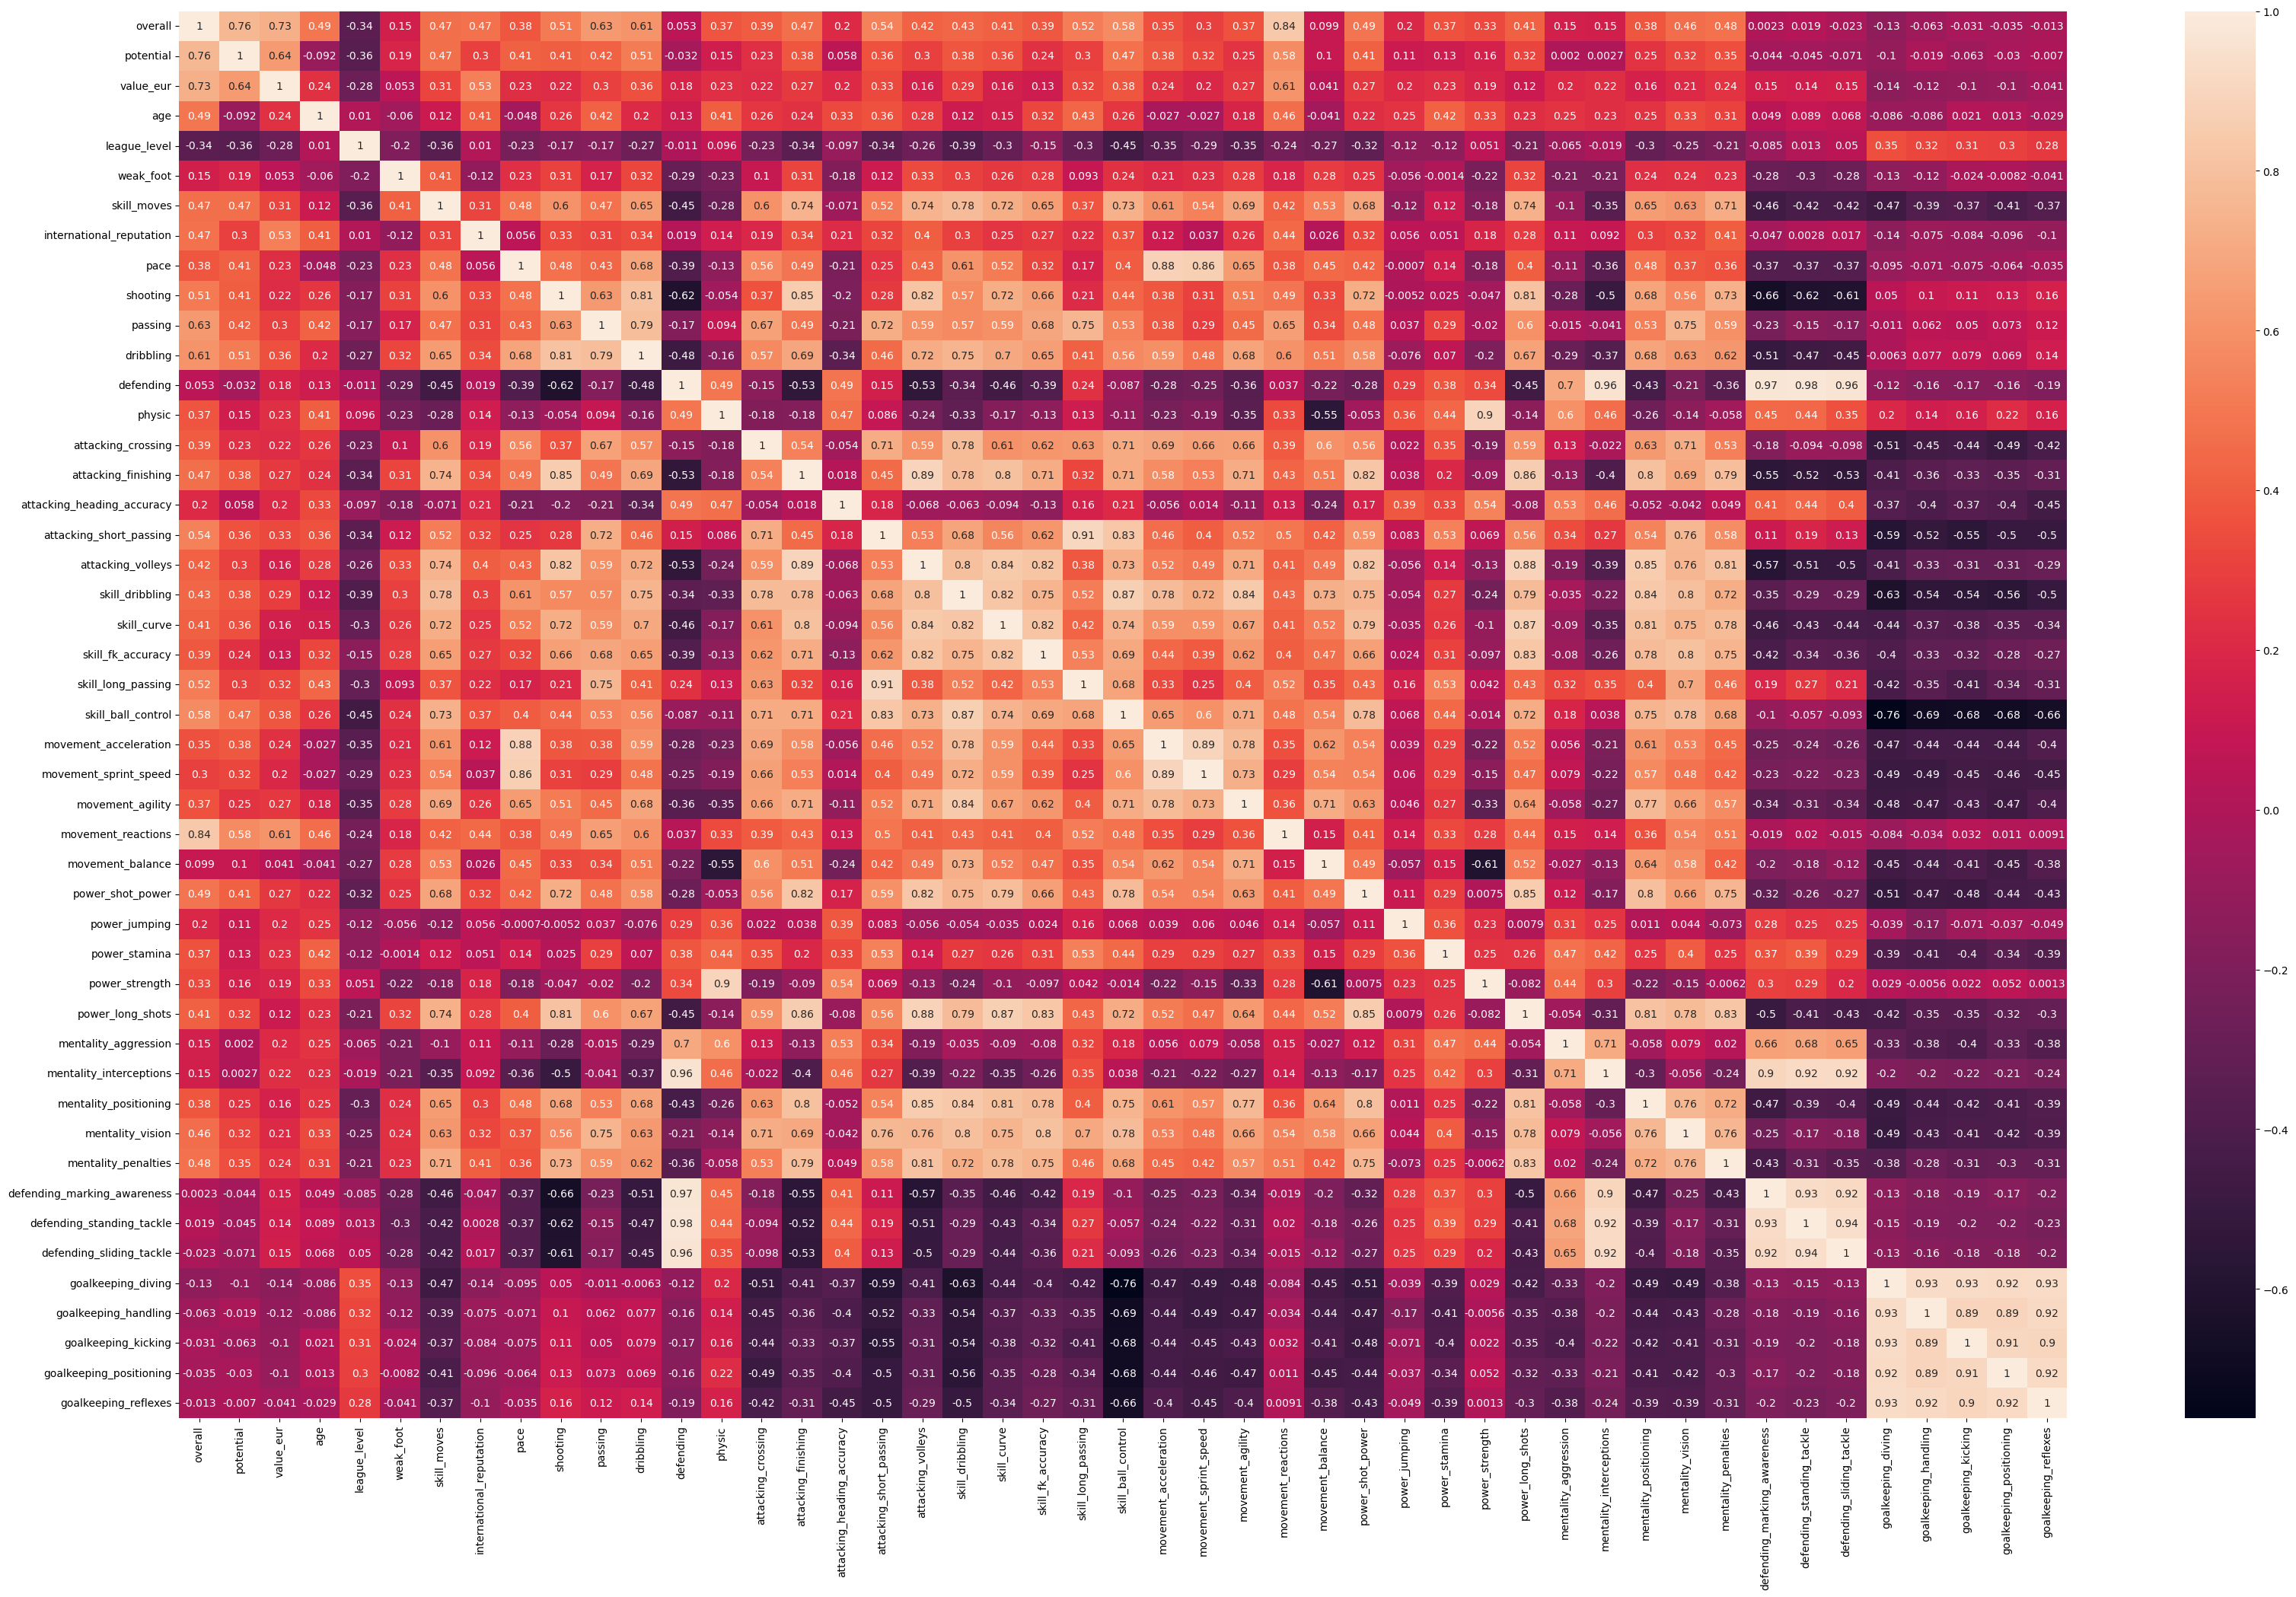

In [239]:
correlation_matrix = var_numeriques.corr()
#Using Pearson Correlation
correlation_matrix = var_numeriques.corr()

plt.figure(figsize=(40,24))
sns.heatmap(correlation_matrix, annot=True)
#sns.heatmap(correlation_matrix.abs(), annot=True)
plt.show()

In [240]:
# Définir un seuil de corrélation
seuil_correlation = 0.8  # Vous pouvez ajuster ce seuil selon vos besoins

# Créer un masque pour sélectionner les valeurs de corrélation supérieures au seuil
mask = correlation_matrix.abs() > seuil_correlation

# Sélectionner les paires de variables fortement corrélées
paires_corr = mask.stack()[mask.stack()].index.tolist()

# Afficher les paires de variables fortement corrélées
print("Paires de variables fortement corrélées :")
for paire in paires_corr:
    var1, var2 = paire
    print(f"{var1} - {var2} : {correlation_matrix.loc[var1, var2]}")

Paires de variables fortement corrélées :
overall - overall : 1.0
overall - movement_reactions : 0.8358713304763892
potential - potential : 1.0
value_eur - value_eur : 1.0
age - age : 1.0
league_level - league_level : 1.0
weak_foot - weak_foot : 1.0
skill_moves - skill_moves : 1.0
international_reputation - international_reputation : 1.0
pace - pace : 1.0
pace - movement_acceleration : 0.8806993656337618
pace - movement_sprint_speed : 0.8648006545049981
shooting - shooting : 1.0
shooting - dribbling : 0.8138401350019525
shooting - attacking_finishing : 0.8527007024258871
shooting - attacking_volleys : 0.8185768487158966
shooting - power_long_shots : 0.8112297404855864
passing - passing : 1.0
dribbling - shooting : 0.8138401350019525
dribbling - dribbling : 1.0
defending - defending : 1.0
defending - mentality_interceptions : 0.9585590167620388
defending - defending_marking_awareness : 0.9687491383232985
defending - defending_standing_tackle : 0.9770093627491122
defending - defending_sl

In [291]:
df15.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3901 entries, 57 to 961764
Columns: 197 entries, overall to work_rate_Medium/Medium
dtypes: bool(150), float64(46), int64(1)
memory usage: 2.0 MB


## 4.Modélisation

###### Nous allons utiliser la régression linéaire comme premier algorithme de prediction.

In [292]:
from sklearn.model_selection import train_test_split
X=df15.drop(columns=['overall'])
y=df15['overall']
display(X.head()) 
display(y.head())

,potential,value_eur,age,league_level,weak_foot,skill_moves,international_reputation,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,league_name_Bundesliga,league_name_Championship,league_name_Ekstraklasa,league_name_Eliteserien,league_name_Eredivisie,league_name_Jupiler Pro League,league_name_La Liga,league_name_La Liga 2,league_name_Ligue 1,league_name_Ligue 2,league_name_Major League Soccer,league_name_Premier League,league_name_Pro League,league_name_Serie A,league_name_Serie B,league_name_Super Lig,league_name_Superliga,club_name_AC Ajaccio,club_name_AC Arles Avignon,club_name_AJ Auxerre,club_name_AS Monaco,club_name_AS Nancy Lorraine,club_name_Aalesund,club_name_Aalesunds FK,club_name_Ajaccio,club_name_Akhmat Grozny,club_name_Al Raed,club_name_Almería,club_name_Angers SCO,club_name_Arles,club_name_Aston Villa,club_name_Atlético de Madrid,club_name_Auxerre,club_name_Barcelona II,club_name_Bologna,club_name_Brest,club_name_Châteauroux,club_name_Crystal Palace,club_name_Demir Grup Sivasspor,club_name_Excelsior,club_name_FC Barcelona B,club_name_FC Bayern München,club_name_FC Groningen,club_name_FC Lokomotiv Moscow,club_name_FC Sochaux-Montbéliard,club_name_FC Twente,club_name_FC Union Berlin,club_name_FC Utrecht,club_name_Feyenoord,club_name_Fiorentina,club_name_Fulham,club_name_Galatasaray SK,club_name_Genoa,club_name_Gençlerbirliği,club_name_Granada,club_name_Granada CF,club_name_Guingamp,club_name_Hellas Verona,club_name_Heracles Almelo,club_name_Juventus,club_name_Korona Kielce,club_name_La Berrichonne de Châteauroux,club_name_Latina,club_name_Laval,club_name_Le Havre,club_name_Le Havre AC,club_name_Lens,club_name_Levante,club_name_Levante Unión Deportiva,club_name_Lierse,club_name_Lierse SK,club_name_Liverpool,club_name_Llagostera-Costa Brava,club_name_Lokomotiv Moskva,club_name_Milan,club_name_Monaco,club_name_Montpellier,club_name_Montpellier Hérault SC,club_name_Málaga,club_name_Málaga CF,club_name_NAC Breda,club_name_Nancy,club_name_Nantes,club_name_Numancia,club_name_Nîmes,club_name_Olympique Marseille,club_name_Olympique de Marseille,club_name_Palermo,club_name_Parma,club_name_Queens Park Rangers,club_name_Racing Club de Lens,club_name_Real Valladolid,club_name_Real Valladolid CF,club_name_Real Zaragoza,club_name_SV Sandhausen,club_name_SV Zulte Waregem,club_name_Sandhausen,club_name_Sivasspor,club_name_Sochaux,club_name_Stade Brestois 29,club_name_Stade Lavallois Mayenne FC,club_name_Standard Liège,club_name_Standard de Liège,club_name_Stoke City,club_name_SønderjyskE,club_name_Terek Grozny,club_name_Torino,club_name_Torino F.C.,club_name_Toronto,club_name_Toulouse,club_name_Toulouse Football Club,club_name_UE Llagostera,club_name_Unión Deportiva Almería,club_name_Vancouver Whitecaps,club_name_Vancouver Whitecaps FC,club_name_Varese,club_name_Vitesse,club_name_Waasland-Beveren,club_name_Willem II,club_name_Zulte-Waregem,club_position_CB,club_position_CDM,club_position_CM,club_position_GK,club_position_LB,club_position_LCB,club_position_LCM,club_position_LDM,club_position_LF,club_position_LM,club_position_LS,club_position_LW,club_position_RAM,club_position_RB,club_position_RCB,club_position_RCM,club_position_RDM,club_position_RES,club_position_RM,club_position_RS,club_position_RW,club_position_ST,club_position_SUB,preferred_foot_Right,work_rate_High/Low,work_rate_High/Me

57     84
221    80
463    78
596    77
921    75
Name: overall, dtype: int64

###### Nous procédons à la division des données en ensembles de test et d'entraînement

In [293]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(3120, 196)
(781, 196)
(3120,)
(781,)


In [294]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

linear_model =LinearRegression()


In [295]:
linear_model .fit(X_train, y_train)

LinearRegression()

In [296]:
y_predi_model = linear_model .predict(X_test)

In [297]:
coefficients = linear_model.coef_
intercept = linear_model.intercept_

print("Coefficients :", coefficients)
print("Interception :", intercept)

Coefficients : [ 5.67419392e-01  4.40200850e+00  1.31375323e+00  1.48858728e+01
  1.63269182e+00 -1.02946539e+00 -2.07438720e+00  3.15359388e+00
 -6.49301724e+00 -1.35331755e+00  3.89872753e+00  3.65022904e+00
  2.57794988e-01  1.27256173e+00  2.42138181e+00  1.21874768e+00
  2.05927277e+00 -1.25296363e+00 -2.65777800e+00  1.45127631e-01
  1.09249112e+00  1.04147061e+00  1.00089544e+00 -9.01900480e-01
 -1.62609679e+00 -1.98448894e-01  6.19615698e-01 -2.32195610e+00
  1.00866916e+00  6.62214483e-01  4.64146407e-01  8.62910731e-01
  1.89639227e+00  1.47888938e+00 -1.35197896e+00  2.66655743e+00
 -9.42786573e-01  3.25540843e-01 -9.56136120e-01 -4.32670197e-01
 -2.88938943e+00 -8.19976009e-01  8.17249425e+00 -1.01304620e+00
 -2.73421593e+00 -4.55958972e+00 -5.93524475e+00 -1.46639339e+01
 -1.76673660e+00  1.73060251e-01  5.62809725e-01  3.84432970e-01
  7.08272451e-01 -2.22865463e+01 -1.17956556e+00 -3.14363078e+01
 -3.50378336e+00  2.69402914e+00 -1.68309730e+00  8.05414221e-01
 -2.450710

In [298]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test, y_predi_model)


print("MSE du modèle:", mse)

MSE du modèle: 0.21956934549111615


In [299]:
rmse = sqrt(mse)

print("RMSE du modèle:", rmse)

RMSE du modèle: 0.4685822718489424


In [301]:
r2 = r2_score(y_test, y_predi_model)

print("R2 du modèle:", r2)

R2 du modèle: 0.9944882897978979


##### Essayons maintenant d'effectuer une prédiction en utilisant le RandomForestRegressor.

In [302]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


rf = RandomForestRegressor(random_state=42)


rf.fit(X_train, y_train)


y_pred_test_rfg = rf.predict(X_test)


mse_test = mean_squared_error(y_test, y_pred_test_rfg)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test_rfg)


y_pred_rfg = rf.predict(X)
mse_all = mean_squared_error(y, y_pred_rfg)
rmse_all = np.sqrt(mse_all)
r2_all = r2_score(y, y_pred_rfg)


print("MSE test:", mse_test)
print("RMSE test:", rmse_test)
print("R-squared test:", r2_test)
print("---------------------------")
print("MSE all:", mse_all)
print("RMSE all:", rmse_all)
print("R-squared all:", r2_all)

MSE test: 0.001740717029449423
RMSE test: 0.04172190107664586
R-squared test: 0.999956303883
---------------------------
MSE all: 0.0013258651627787801
RMSE all: 0.03641243143184454
R-squared all: 0.999967748485403


In [303]:
X_18=df18.drop(columns=['overall'])
y_18=df18['overall']
display(X_18.head()) 
display(y.head())

,potential,value_eur,age,league_level,weak_foot,skill_moves,international_reputation,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,league_name_3. Liga,league_name_Allsvenskan,league_name_Bundesliga,league_name_Championship,league_name_Ekstraklasa,league_name_Eredivisie,league_name_Jupiler Pro League,league_name_La Liga,league_name_La Liga 2,league_name_Liga Portugal,league_name_Ligue 1,league_name_Ligue 2,league_name_Premier League,league_name_Premiership,league_name_Pro League,league_name_Serie A,league_name_Serie B,league_name_Super League,league_name_Super Lig,club_name_ADO Den Haag,club_name_AJ Auxerre,club_name_AS Nancy Lorraine,club_name_AS Saint-Étienne,club_name_AZ,club_name_AZ Alkmaar,club_name_Ajax,club_name_Al Hilal,club_name_Al Nassr,club_name_Al Raed,club_name_Almería,club_name_Amiens SC,club_name_Ankaraspor,club_name_Antalyaspor,club_name_Auxerre,club_name_Avellino,club_name_Benevento,club_name_CD Leganés,club_name_CD Numancia,club_name_CD Tondela,club_name_Caen,club_name_Chievo Verona,club_name_Cultural Leonesa,club_name_Dijon,club_name_Dijon FCO,club_name_Empoli,club_name_Excelsior,club_name_FC Groningen,club_name_FC Lugano,club_name_FC Nantes,club_name_FC Schalke 04,club_name_FC Sochaux-Montbéliard,club_name_FC St. Pauli,club_name_FC Twente,club_name_FC Utrecht,club_name_Fenerbahçe,club_name_Fenerbahçe SK,club_name_Feyenoord,club_name_Galatasaray,club_name_Galatasaray SK,club_name_Genk,club_name_Genoa,club_name_Getafe,club_name_Getafe CF,club_name_Girona,club_name_Girona FC,club_name_Hibernian,club_name_Huddersfield Town,club_name_Häcken,club_name_Jahn Regensburg,club_name_Juventus,club_name_KV Mechelen,club_name_Korona Kielce,club_name_LOSC Lille,club_name_Las Palmas,club_name_Leeds United,club_name_Leganés,club_name_Lille,club_name_Lokeren,club_name_Lugano,club_name_Mechelen,club_name_Moreirense,club_name_Moreirense FC,club_name_Málaga,club_name_Málaga CF,club_name_NAC Breda,club_name_Nancy,club_name_Nantes,club_name_Newcastle United,club_name_Numancia,club_name_Nîmes,club_name_Nîmes Olympique,club_name_Olympiacos CFP,club_name_Olympiakos Piraeus,club_name_Orléans,club_name_Osmanlıspor,club_name_PAOK,club_name_PEC Zwolle,club_name_Paris,club_name_Paris FC,club_name_Real Betis,club_name_Real Betis Balompié,club_name_Real Madrid,club_name_Real Madrid CF,club_name_Real Valladolid,club_name_Real Valladolid CF,club_name_Reims,club_name_Royal Excel Mouscron,club_name_Saint-Étienne,club_name_Salernitana,club_name_Schalke 04,club_name_Sint-Truiden,club_name_Sirius,club_name_Sochaux,club_name_Southampton,club_name_Sportfreunde Lotte,club_name_Sporting Lokeren,club_name_St. Pauli,club_name_Stade Malherbe Caen,club_name_Stade de Reims,club_name_Standard Liège,club_name_Standard de Liège,club_name_Stoke City,club_name_Tondela,club_name_Toulouse,club_name_US Orléans Loiret Football,club_name_US Salernitana 1919,club_name_Udinese,club_name_Udinese Calcio,club_name_Unión Deportiva Almería,club_name_Unión Deportiva Las Palmas,club_name_VVV-Venlo,club_name_Valenciennes,club_name_Valenciennes FC,club_name_VfL Sportfreunde Lotte,club_name_Waasland-Beveren,club_name_Watford,club_name_Willem II,club_name_Wolverhampton Wanderers,club_name_Yeni Malatyaspor,club_name_İstanbul Başakşehir,club_name_İstanbul Başakşehir FK,club_position_CDM,club_position_CF,club_position_CM,club_position_GK,

57     84
221    80
463    78
596    77
921    75
Name: overall, dtype: int64

In [304]:
X_train,X_test,y_train,y_test=train_test_split(X_18,y_18,test_size=0.2,random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5666, 217)
(1417, 217)
(5666,)
(1417,)


In [307]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression

linear_model_18 =LinearRegression()

linear_model_18 .fit(X_train, y_train)

y_predi_model_18 = linear_model_18.predict(X_test)

In [309]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

mse18 = mean_squared_error(y_test, y_predi_model_18)


print("MSE  du modèle 2018:", mse)

rmse18 = sqrt(mse)

print("RMSE  du modèle 2018:", rmse)
r2_18 = r2_score(y_test, y_predi_model_18)

print("R2 du modèle 2018:", r2)

MSE  du modèle 2018: 0.21956934549111615
RMSE  du modèle 2018: 0.4685822718489424
R2 du modèle 2018: 0.9944882897978979
